In [1]:
import pandas as pd

In [2]:
raw_data = pd.read_csv('C:/Users/user/Google 드라이브/AIFFEL/+Final project/testData_20220503_5by5.csv', sep=',')
# raw_data = pd.read_csv('C:/Users/user/Google 드라이브/AIFFEL/+Final project/testData_20220502_2.csv', quotechar=',')
raw_data.head()

,Unnamed: 0,FSR1,FSR2,FSR3,FSR4,FSR5,FSR6,FSR7,FSR8,FSR9,...,FSR55,FSR56,FSR57,FSR58,FSR59,FSR60,FSR61,FSR62,FSR63,FSR64
0,DATA,822000,0,0,257526,0,0,0,1647000,0,...,20076,15401,17328,13500,11494,10060,9132,8250,7702,7071
1,DATA,338379,1097000,0,1647000,0,0,518052,1647000,3297000,...,18615,15714,18615,16335,13500,12207,10963,9741,8538,7737
2,DATA,3297000,0,1647000,3297000,0,0,518052,1647000,0,...,15714,12277,14157,11688,10711,9375,9282,8899,8379,7737
3,DATA,615750,0,0,1647000,822000,822000,1647000,1647000,0,...,22190,19247,23756,18475,14460,11842,11776,9692,8899,8000
4,DATA,822000,822000,822000,0,615750,822000,0,3297000,1097000,...,15065,13071,14967,13071,12137,10580,10580,9741,8771,8123


In [3]:
prep1_data = raw_data.drop(['Unnamed: 0'], axis = 1)
prep1_data.head()

,FSR1,FSR2,FSR3,FSR4,FSR5,FSR6,FSR7,FSR8,FSR9,FSR10,...,FSR55,FSR56,FSR57,FSR58,FSR59,FSR60,FSR61,FSR62,FSR63,FSR64
0,822000,0,0,257526,0,0,0,1647000,0,0,...,20076,15401,17328,13500,11494,10060,9132,8250,7702,7071
1,338379,1097000,0,1647000,0,0,518052,1647000,3297000,822000,...,18615,15714,18615,16335,13500,12207,10963,9741,8538,7737
2,3297000,0,1647000,3297000,0,0,518052,1647000,0,0,...,15714,12277,14157,11688,10711,9375,9282,8899,8379,7737
3,615750,0,0,1647000,822000,822000,1647000,1647000,0,1647000,...,22190,19247,23756,18475,14460,11842,11776,9692,8899,8000
4,822000,822000,822000,0,615750,822000,0,3297000,1097000,3297000,...,15065,13071,14967,13071,12137,10580,10580,9741,8771,8123


In [4]:
import numpy as np

np_data = prep1_data.to_numpy()
np_data

array([[ 822000,       0,       0, ...,    8250,    7702,    7071],
       [ 338379, 1097000,       0, ...,    9741,    8538,    7737],
       [3297000,       0, 1647000, ...,    8899,    8379,    7737],
       ...,
       [1097000,       0, 1647000, ...,    9484,    9282,    8418],
       [      0,       0,       0, ...,    8633,    7855,    7102],
       [      0,       0,  518052, ...,   17625,   14967,   11977]],
      dtype=int64)

In [5]:
np_data.shape

(193, 64)

In [6]:
import copy

stats_data = copy.deepcopy(prep1_data)
stats_data.iloc[49]

FSR1      238463
FSR2     1647000
FSR3     1097000
FSR4     1097000
FSR5           0
          ...   
FSR60      11623
FSR61      11688
FSR62       9958
FSR63       8813
FSR64       7807
Name: 49, Length: 64, dtype: int64

In [7]:
stats_data.iloc[-1]

FSR1           0
FSR2           0
FSR3      518052
FSR4     3297000
FSR5     3297000
          ...   
FSR60      18951
FSR61      21384
FSR62      17625
FSR63      14967
FSR64      11977
Name: 192, Length: 64, dtype: int64

In [8]:
mean_stats_data = pd.DataFrame(stats_data.mean(axis = 0)).transpose()
std_stats_data = pd.DataFrame(stats_data.std(axis = 0)).transpose()
mean_stats_data.head()

,FSR1,FSR2,FSR3,FSR4,FSR5,FSR6,FSR7,FSR8,FSR9,FSR10,...,FSR55,FSR56,FSR57,FSR58,FSR59,FSR60,FSR61,FSR62,FSR63,FSR64
0,204796.818653,726478.694301,395940.300518,732153.010363,864386.818653,303712.725389,787546.145078,892746.160622,217722.73057,229845.243523,...,18785.958549,15398.196891,17797.38342,14718.321244,12696.668394,11060.134715,10661.595855,9530.813472,8704.388601,7911.284974


In [9]:
mean_stats_data.shape

(1, 64)

In [10]:
stats_data.shape

(193, 64)

In [11]:
total_data = pd.concat([stats_data, mean_stats_data, std_stats_data])
total_data.tail()

,FSR1,FSR2,FSR3,FSR4,FSR5,FSR6,FSR7,FSR8,FSR9,FSR10,...,FSR55,FSR56,FSR57,FSR58,FSR59,FSR60,FSR61,FSR62,FSR63,FSR64
190,1.097000e+06,0.000000,1.647000e+06,0.000000e+00,1.097000e+06,0.000000e+00,1.097000e+06,0.000000e+00,0.000000e+00,0.000000,...,15714.000000,12739.000000,14068.000000,13256.000000,11224.000000,10711.000000,10060.000000,9484.000000,9282.000000,8418.000000
191,0.000000e+00,0.000000,0.000000e+00,5.180520e+05,0.000000e+00,2.798570e+05,1.097000e+06,0.000000e+00,1.097000e+06,0.000000,...,23756.000000,18063.000000,21029.000000,16959.000000,12993.000000,10524.000000,10009.000000,8633.000000,7855.000000,7102.000000
192,0.000000e+00,0.000000,5.180520e+05,3.297000e+06,3.297000e+06,1.647000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,14157.000000,13779.000000,19758.000000,20076.000000,20076.000000,18951.000000,21384.000000,17625.000000,14967.000000,11977.000000
0,2.047968e+05,726478.694301,3.959403e+05,7.321530e+05,8.643868e+05,3.037127e+05,7.875461e+05,8.927462e+05,2.177227e+05,229845.243523,...,18785.958549,15398.196891,17797.383420,14718.321244,12696.668394,11060.134715,10661.595855,9530.813472,8704.388601,7911.284974
0,3.169910e+05,964758.737256,4.886242e+05,9.611787e+05,1.032540e+06,4.959482e+05,1.076040e+06,1.173082e+06,5.358605e+05,408099.021470,...,2863.207774,2066.693377,2526.857763,1776.500390,1305.799282,1037.961279,1094.090919,799.844305,639.062562,475.256933


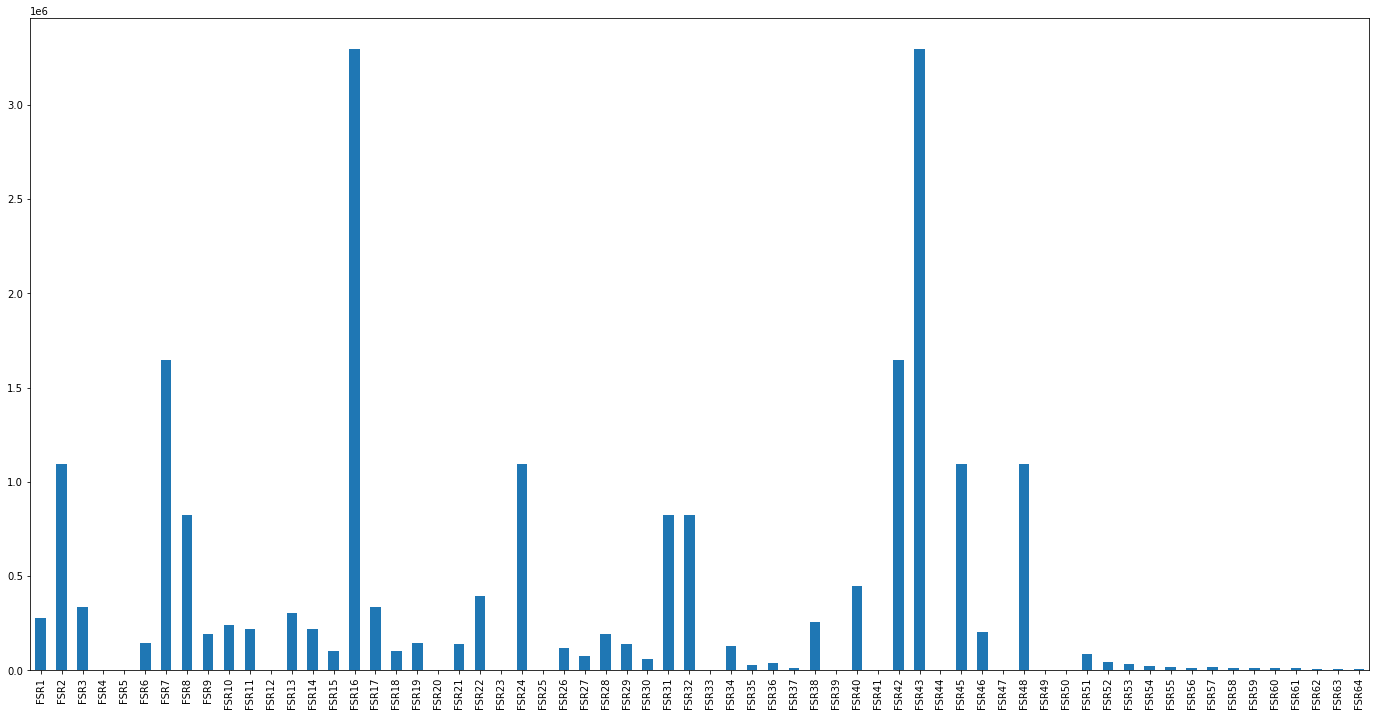

In [18]:
import matplotlib.pyplot as plt

# fig, ax = plt.subplots(2,1, figsize = (24,24))
# ax[0].bar(total_data.iloc[50], title='Sample data', figsize=(12, 4), legend=True, fontsize=12)
# ax[0].set_xlabel('Sensor No.', fontsize=12)   
# ax[0].set_ylabel('Mean', fontsize=12)   

# ax[1] = total_data.iloc[51].plot(kind='bar', title='Sample data', figsize=(12, 4), legend=True, fontsize=12)
# ax[1].set_xlabel('Sensor No.', fontsize=12)   
# ax[1].set_ylabel('STD', fontsize=12)   


total_data.iloc[50].plot(kind='bar', figsize=(24, 12))





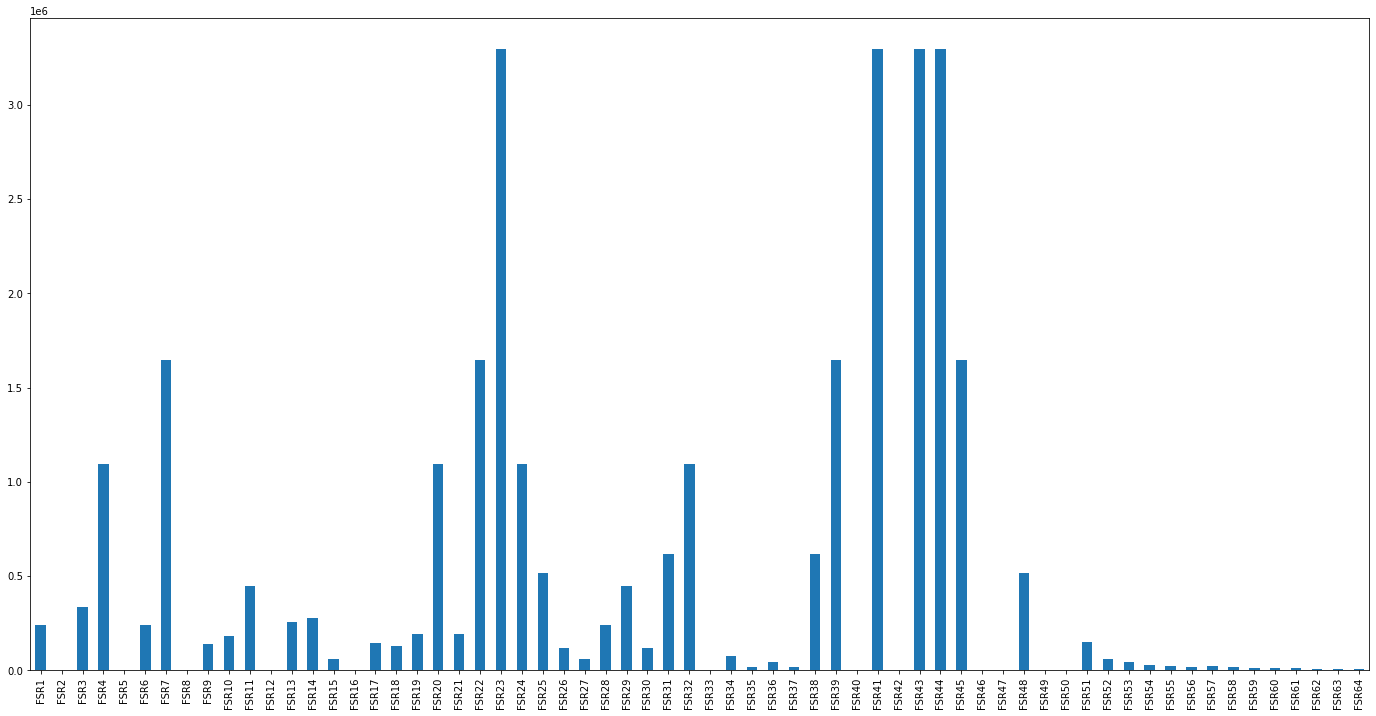

In [19]:
total_data.iloc[51].plot(kind='bar', figsize = (24,12)) 

In [14]:
total_data.iloc[51,63]

7737.0

In [15]:
prep1_data.shape

(193, 64)

In [16]:
total_data[1] 

KeyError: 1

In [ ]:
stats_data[51] 

In [ ]:
stats_data[49] 

In [ ]:
stats_data[52] 

In [ ]:
# fig, ax = plt.subplots(2,1, figsize = (24,24))
stats_data.plot.line(figsize = (50, 24))